## Gradient Boosting Classification in Python

Here, we will apply the gradient boosting technique to a real-world classification problem where our task is to predict whether a given patient is diabetic or not from a certain set of medical features.

####  Load and read data

In [1]:
# Importing the required library
import pandas as pd

# Reading the dataset
data = pd.read_csv('diabetes.csv')

# Checking top 5 rows of dataset
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Now let’s quickly check the size of the dataset.

In [2]:
# Checking the shape of the dataset
data.shape

(768, 9)

As we can see from the above two outputs, out of 9 columns the first 8 columns will be treated as input features, and the last Outcome column holds the diabetes status of the patients in binary form which is our output feature. 

The output feature holds the two class labels that are 0 (non-diabetic) and 1 (diabetic), now we will check the distribution of these class labels. 

In [3]:
# Class label count
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [4]:
# Percentage distribution
data['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

Out of the records of all 768 patients, there are 500 or 65.10% patients who do not have diabetes and 268 or 34.89% patients who have diabetes.

#### Defining input-output features

As of now, we have got a basic understanding of our dataset. In the previous step, we identified a set of input features and one output feature; below we define those as X and y respectively.

In [5]:
# Defining input (X) and output (y) features
X = data.iloc[:,:-1].values
y = data.iloc[:, -1].values

After defining X and y, now we will create a separate training and testing dataset by using SK-Learn’s `train_test_split()` method, and later this dataset will be used in the training and testing phase respectively.  Out of 768 records we are keeping 10% records for testing the model and the rest 90% will be used for training.  

In [6]:
# Creating training and test patterns
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, shuffle=True, random_state = 0)

Now let’s check the shape of the training and testing dataset.

In [7]:
# Checking shape of training and test sets
X_train.shape, X_test.shape

((691, 8), (77, 8))

From the above shapes, 77 records or 10% of the total records will be used to evaluate the performance of the model, and the model will be trained by the rest of 691 records.  

Before moving to the model building let's take a look at input features patterns. 

In [8]:
# input patterns
X_train

array([[6.00e+00, 1.54e+02, 7.40e+01, ..., 2.93e+01, 8.39e-01, 3.90e+01],
       [4.00e+00, 8.30e+01, 8.60e+01, ..., 2.93e+01, 3.17e-01, 3.40e+01],
       [1.00e+00, 9.70e+01, 7.00e+01, ..., 3.81e+01, 2.18e-01, 3.00e+01],
       ...,
       [4.00e+00, 9.40e+01, 6.50e+01, ..., 2.47e+01, 1.48e-01, 2.10e+01],
       [1.10e+01, 8.50e+01, 7.40e+01, ..., 3.01e+01, 3.00e-01, 3.50e+01],
       [5.00e+00, 1.36e+02, 8.20e+01, ..., 0.00e+00, 6.40e-01, 6.90e+01]])

#### Initializing and training and Gradient Boosting Classifier

In this step first, we will import the Gradient boosting classifier from the sklearn library and will initialize it.

In [9]:
# Defining the Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()

The GBM classifier deals with a certain set of hyperparameters which can help us to maximize the performance of the classifier. Out of those all hyperparameters, the `learning rate`, and `loss function` play a crucial role so we are going to tune these two parameters with GridSearchCV, and the rest parameters will be kept at their default values. 

The GridSearchCV searches for the optimal value of hyperparameters from a range of values given by the user and returns the best possible settings. In our case, grid search will give the best learning rate from  0.01,0.1,1 and the best loss function from log loss, and exponential.

In [11]:
# Get values for lr, loss
from sklearn.model_selection import GridSearchCV

# prams to be searched
param_grid  = {'learning_rate': [0.01,0.1,1], 'loss': ['log_loss','exponential']}
grid = GridSearchCV(classifier, param_grid, scoring='accuracy', return_train_score=False)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'learning_rate': 0.1, 'loss': 'exponential'}


As we see from the above output Grid search has returned the optimal value for learning rate and loss as 0.1 and exponential respectively. Now let’s train the classifier with these parameters.

In [12]:
# Training the GBM classifier
classifier = GradientBoostingClassifier(learning_rate= 0.1, loss= 'exponential')
classifier.fit(X_train, y_train)

GradientBoostingClassifier(loss='exponential')

#### Predicting and evaluating the classifier

After successfully training the classifier, now let’s obtain the prediction on the test dataset. And compare it with actual values side-by-side.

In [13]:
# Making predictions with the test data
y_pred = classifier.predict(X_test)

# Combining the actual and predicted values
pd.DataFrame(data={'Actual Outcomes': y_test, 'Predicted Outcomes': y_pred}).head()

,Actual Outcomes,Predicted Outcomes
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0


All above 5 predicted labels are matched perfectly with actual labels but there might be some labels that are incorrectly predicted so let’s look at all predictions using a confusion matrix.

C:\Users\thaku\anaconda3\envs\deep-learning\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


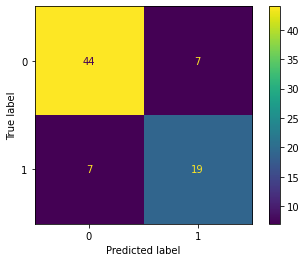

In [15]:
# Confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test);

As we can see the confusion metrics that help us reveal the complete truth of the predictions. So there are 44+19=63 correctly identified labels and 7+7=14 incorrectly identified labels. The combined accuracy is 63 / (63+14) =  0.8181 which is nothing but the testing accuracy. This same accuracy can be obtained by the metric called accuracy_score as below.

In [16]:
# Accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8181818181818182

Now we do the final evaluation of this classifier by using the classification report which returns the score for various metrics between 0 and 1. A score closer to 1 resembles a good-performing model.

In [17]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        51
           1       0.73      0.73      0.73        26

    accuracy                           0.82        77
   macro avg       0.80      0.80      0.80        77
weighted avg       0.82      0.82      0.82        77



In the above report, we have obtained a satisfactory score for all the metrics which inherently results that we have a good-performing classification model. 

As we have seen GBM performs well on classification problems, In a similar way, we can use the GBM for a regression problem. 

### Gradient Boosting Regression in Python

As we have gone through an application of GBM in a classification problem, in this part, we will implement this technique in a regression problem. 

To address the regression problem using GBM we are considering a dataset where our task is to predict the health insurance premium from a given set of attributes. The dataset contains a total of 7 features out of which 6 will be the predictors (input features) and one will be the target (output feature) column. 

So to implement regression problem using the Gradient Boosting Machine technique in Python, the following steps are to be followed

#### Read and load the data

As usual first we will load the data using pandas and will observe the top 5 rows of it.

In [18]:
# Import pandas
import pandas as pd

# Load the data
data = pd.read_csv('insurance.csv')

# Visualize the top 5 rows
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Now let’s quickly review the basic information of this dataset using the .info() method.

In [19]:
# Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We have a total of 1338 records and 7 columns to deal with. Out of these 7 columns, the first 6 starting from index position 0 to 5 will be our input features, and the last column named charges is the output feature that holds the continuous values to be learned and predicted by the model.  

#### Preprocess and define input(x)-output(y) features

As we can see, in our input features there are 3 textual categorical columns and we need to convert those into numbers. For this purpose, we are using the LabelEncoder class from the sklearn library that represents data into numbers.   

In [20]:
# Label encoding
from sklearn.preprocessing import LabelEncoder

# Extract categorical columns
cat_columns = data.select_dtypes('object').columns

# Encode the columns
data[cat_columns] = data[cat_columns].apply(LabelEncoder().fit_transform)

Now we have successfully converted the textual categorical data into a number. In the previous step, we identified a set of input features and one output feature; below we define those as X and y respectively.

In [21]:
# Defining input (X) and output (y) features
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

To train and evaluate the model we must have two different sets of data that will be used in respective phases. Below we are going to create these two sets namely the training and testing set. 

In [22]:
# Creating training and test patterns
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle=True, random_state = 0)

After splitting the data let's quickly check the shape of the train and test data.

In [23]:
# Checking shape of training and test sets
X_train.shape, X_test.shape

((1070, 6), (268, 6))

Before moving further let’s quickly have a sanity check by observing the input patterns so that we can ensure that data is ready for modelling.

In [24]:
# Input patterns
X_train

array([[37.  ,  1.  , 34.1 ,  4.  ,  1.  ,  3.  ],
       [18.  ,  1.  , 34.43,  0.  ,  0.  ,  2.  ],
       [23.  ,  0.  , 36.67,  2.  ,  1.  ,  0.  ],
       ...,
       [40.  ,  1.  , 25.08,  0.  ,  0.  ,  2.  ],
       [19.  ,  1.  , 35.53,  0.  ,  0.  ,  1.  ],
       [33.  ,  0.  , 18.5 ,  1.  ,  0.  ,  3.  ]])

As we can see our data looks fine and we did all the necessary preprocessing steps.

#### Initialize and train GBM regressor

As we did in the classification problem here the GBM regressor can be imported from the sklearn library and we create an instance of it. 

In [25]:
# Defining the Gaussian Naive Bayes
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()

Now will train the regressor with all default values of Hyperparameters. 

In [26]:
# Training the SVM classifier
regressor.fit(X_train, y_train)

GradientBoostingRegressor()

#### Predicting and evaluating the GBM regressor

After successfully training the regressor let’s obtain the prediction on test data and compare it side-by-side with actual values.

In [27]:
# Making predictions on the test data
y_pred = regressor.predict(X_test)

# Comparing the predicted profits with actual profits
pd.DataFrame(data={ 'Actual Charges': y_test,'Predicted Charges': y_pred}).head()

,Actual Charges,Predicted Charges
0,9724.53000,12141.827923
1,8547.69130,9538.762935
2,45702.02235,45616.085830
3,12950.07120,13958.936934
4,9644.25250,10330.394823


As we can see in the comparison few predictions are closer to the actual values and few have differences. To ensure the performance of the model, now we will evaluate this GBM regressor using Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-Squared, and Adjusted R-Squared metrics.

In [28]:
# Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test, y_pred)
print('Mean Squared Error is:', MSE)

Mean Squared Error is: 16212736.429638132


The MSE returns the average squared difference between actual and predicted values and the above looks too large. As it is the squared error, let's take root over it. 

In [29]:
# Root Mean Squared Error (RMSE)
import math
RMSE = math.sqrt(MSE)
print('Root Mean Squared Error is:', RMSE)

Root Mean Squared Error is: 4026.5042443338034


RMSE tells us the standard deviation of the residuals (prediction errors). 

In [30]:
# R-Squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R-Squared is:', r2)

R-Squared is: 0.8981163811449989


s we can see the R-squared value is close to 1 which indicates we have the best fit model. We are dealing with the multi-regression problem. It is better to conclude our evaluation using an adjusted R-squared value. 

In [31]:
# Adjusted R-Squared
adj = 1-(
         (1-r2)*(X_train.shape[0]-1)/
          (X_train.shape[0]-X_train.shape[1]-1)
          )
print('Adjusted R-Squared is:', adj)

Adjusted R-Squared is: 0.8975413089783667


As we can see, the scores of Adjusted R-Squared and R-Squared are very close to each other which tells us that having multiple independent features has not affected the performance of the model. 

So this is how we can implement the Gradient Boosting Machine for both classification and regression problems on real-world datasets.